In [4]:
# defeat warning NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, 
# currently the 'ssl' module is compiled with 'LibreSSL 2.8.3
!pip install 'urllib3<2'
!pip install --upgrade jupyter ipywidgets

!pip install ipywidgets
!pip install gradio
!pip install pandas
!pip install seaborn
!pip install scipy
from IPython.display import Image, display
%matplotlib inline

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [5]:
import gradio as gr
import pandas as pd
import ipywidgets

# Define the data
sales_data = [
    {'Day': 1, 'Breads Sold': 39},
    {'Day': 2, 'Breads Sold': 36},
    {'Day': 3, 'Breads Sold': 21},
    {'Day': 4, 'Breads Sold': 33},
    {'Day': 5, 'Breads Sold': 38},
    {'Day': 6, 'Breads Sold': 32},
    {'Day': 7, 'Breads Sold': 36},
    {'Day': 8, 'Breads Sold': 38},
    {'Day': 9, 'Breads Sold': 33},
    {'Day': 10, 'Breads Sold': 24},
    {'Day': 11, 'Breads Sold': 23},
    {'Day': 12, 'Breads Sold': 37},
    {'Day': 13, 'Breads Sold': 37},
    {'Day': 14, 'Breads Sold': 28},
    {'Day': 15, 'Breads Sold': 23},
    {'Day': 16, 'Breads Sold': 34},
    {'Day': 17, 'Breads Sold': 30},
    {'Day': 18, 'Breads Sold': 20},
    {'Day': 19, 'Breads Sold': 35},
    {'Day': 20, 'Breads Sold': 40},
    {'Day': 21, 'Breads Sold': 25},
    {'Day': 22, 'Breads Sold': 29},
    {'Day': 23, 'Breads Sold': 28},
    {'Day': 24, 'Breads Sold': 37},
    {'Day': 25, 'Breads Sold': 29},
    {'Day': 26, 'Breads Sold': 33},
    {'Day': 27, 'Breads Sold': 27},
    {'Day': 28, 'Breads Sold': 35},
    {'Day': 29, 'Breads Sold': 25},
    {'Day': 30, 'Breads Sold': 31}
]

# Convert the data to a pandas DataFrame
df = pd.DataFrame(sales_data)

# Create a new column "Is Success" based on the condition
df['Is Success'] = df['Breads Sold'] >= 30

# Calculate the number of successful days (where "Breads Sold" is 30 or more)
successful_days = len(df[df['Breads Sold'] >= 30])

# Calculate the total number of days
total_days = len(df)

# Calculate the probability of success and convert to percentage
probability_of_success = (successful_days / total_days) * 100

print(df)
# Display the probability as a percentage
print("Probability of success:", probability_of_success, "%")

/Users/user/haff/catatan-ai-bootcamp/Foundational_Knowledge/deleted/my_venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


    Day  Breads Sold  Is Success
0     1           39        True
1     2           36        True
2     3           21       False
3     4           33        True
4     5           38        True
5     6           32        True
6     7           36        True
7     8           38        True
8     9           33        True
9    10           24       False
10   11           23       False
11   12           37        True
12   13           37        True
13   14           28       False
14   15           23       False
15   16           34        True
16   17           30        True
17   18           20       False
18   19           35        True
19   20           40        True
20   21           25       False
21   22           29       False
22   23           28       False
23   24           37        True
24   25           29       False
25   26           33        True
26   27           27       False
27   28           35        True
28   29           25       False
29   30   

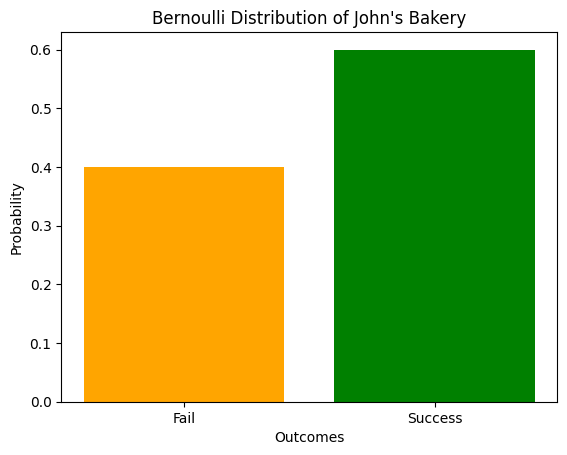

interactive(children=(FloatSlider(value=0.6, description='p', max=1.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.plot_bernoulli(p=0.6)>

In [6]:
# @title #### John Bakery Chart
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

def plot_bernoulli(p=0.6):
    variance = p * (1 - p)
    mean = p  # Mean of a Bernoulli distribution is equal to its parameter p

    outcomes = np.array([0, 1])
    probabilities = np.array([1 - p, p])

    plt.bar(outcomes, probabilities, color=['orange', 'green'])
    plt.xticks(outcomes, ['Fail', 'Success'])

    plt.ylabel('Probability')
    plt.xlabel('Outcomes')
    plt.title("Bernoulli Distribution of John's Bakery")

    # plt.text(0.5, 0.5, 'Mean: {:.2f}'.format(mean), ha='center', va='center',
    #          bbox=dict(facecolor='white', alpha=0.5, boxstyle="round,pad=0.5"))

    # plt.text(0.5, 0.4, 'Variance: {:.2f}'.format(variance), ha='center', va='center',
    #          bbox=dict(facecolor='white', alpha=0.5, boxstyle="round,pad=0.5"))
    plt.show()

widgets.interact(plot_bernoulli, p=(0,1,0.01))

## Binomial Distribution

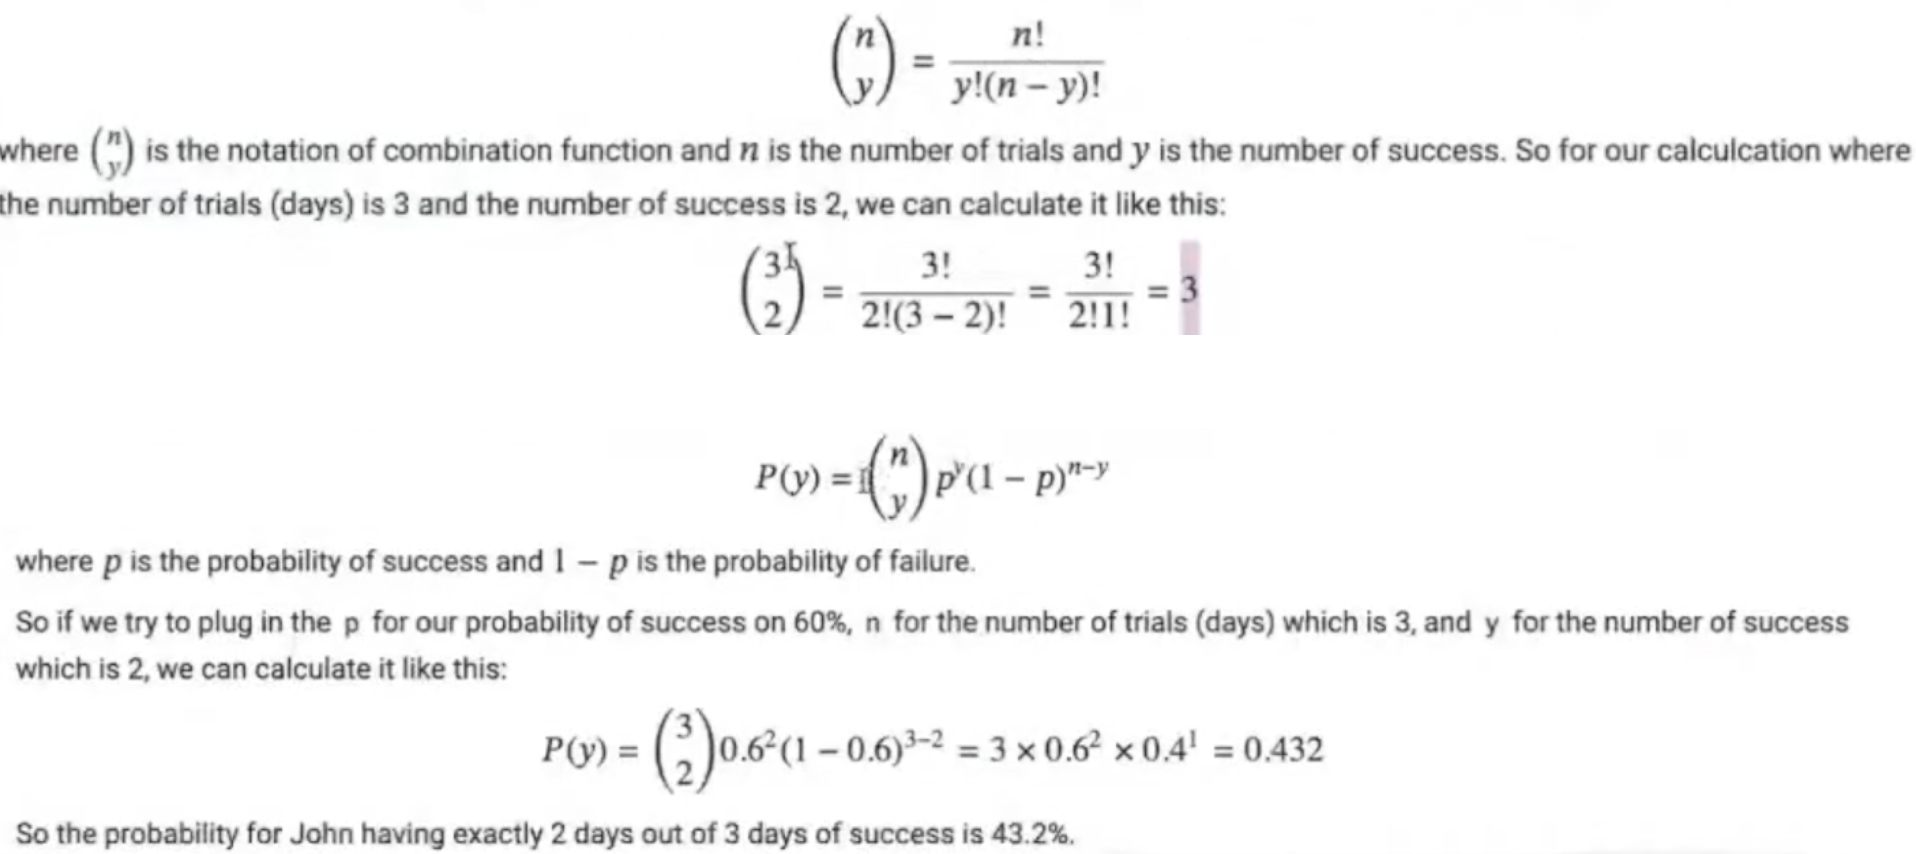

In [10]:
display(Image(filename="binomial_function.png"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from ipywidgets import interact, IntSlider, FloatSlider

def plot_binomial_distribution(n, p):
    x = np.arange(0, n + 1)
    y = binom.pmf(x, n, p)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(x, y)
    plt.xlabel('Number of Days With Success (y)')
    plt.ylabel('Probability')
    plt.title(f'Binomial Distribution - n={n}, p={p}')
    plt.grid(axis='y')

    # Adding probability values to each bar
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{y[i]:.2f}', ha='center', va='bottom')

    plt.show()

# Creating an interactive widget
interact(plot_binomial_distribution,
         n=IntSlider(min=3, max=30, step=1, value=15, description='n: Number of Trials'),
         p=FloatSlider(min=0, max=1, step=0.01, value=0.6, description='p: Probability of Success'))


interactive(children=(IntSlider(value=15, description='n: Number of Trials', max=30, min=3), FloatSlider(value…

<function __main__.plot_binomial_distribution(n, p)>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from scipy import stats

# Global variable to store the commute times data
global_commute_times = None

# Function to update the plot based on new mean and std_dev
def update_plot(mean, std_dev):
    global global_commute_times  # Referencing the global variable

    # Generating 3000 data points
    global_commute_times = np.random.normal(mean, std_dev, 3000)

    # Plotting
    plt.figure(figsize=(25, 6))
    
    sns.histplot(global_commute_times, kde=True, bins=30, color="blue")
    plt.title("Distribution of Commute Times")
    
    plt.xlabel("Commute Time (minutes)")
    
    plt.ylabel("Frequency")
    
    # Mean Line
    plt.axvline(x=mean, color='red', linestyle='-')
    plt.text(mean + 0.5, 25, f'Mean: {mean} min', color='red')

    # Standard deviation Lines with different colors
    colors = ['green', 'orange', 'purple']
    for i in range(1, 4):
        plt.axvline(x=mean - i * std_dev, color=colors[i-1], linestyle='--')
        plt.axvline(x=mean - i * std_dev, color=colors[i-1], linestyle='--')
        plt.text(mean + i * std_dev + 0.5, 20, f'Stddev: {i * std_dev:.2f} min', color=colors[i-1])
        plt.text(mean - i * std_dev + 0.5, 20, f'Stddev: {i * std_dev:.2f} min', color=colors[i-1])
    
    plt.grid(True)
    plt.show()

    calculate_statistics(mean, std_dev)

def calculate_statistics(mean, std_dev):
    global global_commute_times

    # Calculating statistics
    median = np.median(global_commute_times)

    variance = np.var(global_commute_times)
    standard_deviation = np.std(global_commute_times)  # Recalculating in case the input std_dev is different

    within_std_1 = np.sum((global_commute_times > mean - std_dev) & (global_commute_times < mean + std_dev))
    within_std_2 = np.sum((global_commute_times > mean - 2 * std_dev) & (global_commute_times < mean + 2 * std_dev))
    within_std_3 = np.sum((global_commute_times > mean - 3 * std_dev) & (global_commute_times < mean + 3 * std_dev))

    total_data_points = len(global_commute_times)

    percentage_within_std_1 = (within_std_1 / total_data_points) * 100
    percentage_within_std_2 = (within_std_2 / total_data_points) * 100
    percentage_within_std_3 = (within_std_3 / total_data_points) * 100
    
    # Displaying the statistics
    print(f'Mean: {mean}')
    print(f'Median: {median}')
    print(f'Variance: {variance}')
    print(f'Standard Deviation: {standard_deviation}')
    print(f'Percentage within 1 std dev: {percentage_within_std_1:.2f}%')
    print(f'Percentage within 2 std devs: {percentage_within_std_2:.2f}%')
    print(f'Percentage within 3 std devs: {percentage_within_std_3:.2f}%')


# Creating widgets
mean_widget = widgets.IntSlider(min=0, max=120, value=60, description="Mean:")
std_dev_widget = widgets.IntSlider(min=1, max=50, value=10, description='Std Dev:')

# Linking widgets to the update function
ui = widgets.VBox([mean_widget, std_dev_widget])
out = widgets.interactive_output(update_plot, {'mean': mean_widget, 'std_dev': std_dev_widget})

# Displaying the widgets and the output
display(ui, out)

Output()

## Exponential Distribution

In [10]:
data = {
    'Customer_Number': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'Interval_to_Previous_Customer': [0.00, 48.40, 0.54, 34.79, 66.44, 2.42, 113.98, 39.54, 1.68, 13.69, 165.46, 47.02, 6.12, 18.26, 32.86, 1.14, 28.57, 36.21, 15.04, 47.84]
}

df = pd.DataFrame(data)
df

,Customer_Number,Interval_to_Previous_Customer
0,1,0.00
1,2,48.40
2,3,0.54
3,4,34.79
4,5,66.44
5,6,2.42
6,7,113.98
7,8,39.54
8,9,1.68
9,10,13.69


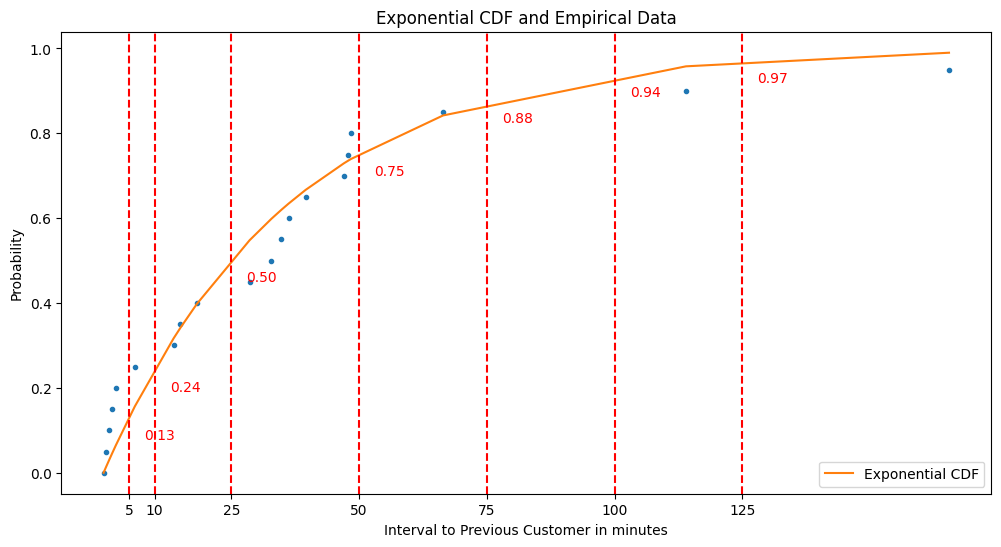

12.97% of people arrive within an interval of 5
24.25% of people arrive within an interval of 10
50.06% of people arrive within an interval of 25
75.06% of people arrive within an interval of 50
87.55% of people arrive within an interval of 75
93.78% of people arrive within an interval of 100
96.90% of people arrive within an interval of 125


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import pandas as pd

# Select the data for fitting the distribution
data = df['Interval_to_Previous_Customer']

# Fit an exponential distribution to the data
loc, scale = expon.fit(data)

# Generate sorted data for x-axis of CDF plot
x = np.sort(data)

# Generate y-axis data for CDF plot
y = np.arange(len(x)) / float(len(x))

# Generate CDF for the exponential distribution
exp_cdf = expon.cdf(x, loc, scale)

# Create a plot
plt.figure(figsize=(12, 6))

plt.plot(x, y, marker='.', linestyle='none')
plt.plot(x, exp_cdf, label='Exponential CDF')
plt.title("Exponential CDF and Empirical Data")
plt.xlabel('Interval to Previous Customer in minutes')
plt.ylabel('Probability')

# Add vertical lines and text annotations
x_values = [5, 10, 25, 50, 75, 100, 125]

for val in x_values:
    plt.axvline(x=val, color='r', linestyle='--')
    prob = expon.cdf(val, loc, scale)  # calculate the probability at the value
    plt.text(val + 3, prob - 0.05, f"{prob:.2f}", color='r')

# Add x-values to x-axis
plt.xticks(x_values)

plt.legend()
plt.show()

# Print the percentage of people coming at each specified interval
for val in x_values:
    prob = expon.cdf(val, loc, scale)  # calculate the probability at the value
    print(f"{prob * 100:.2f}% of people arrive within an interval of {val}")